
![alt text](download.png)


><li>  <font color=green>Student: Andzelika Balyseviene</font> </li>
><li>  <font color=green>Date: April 9, 2019</font></li>
><li>  <font color=green>Dataset: The Movie Database TMDb</font></li>
    

# Project: Investigate the Top Rating Films

## Contents
><ul>
><li><font color=green> Introduction</font></li>
><li><font color=green> Data Wrangling</font></li>
><li><font color=green> Exploratory Data Analysis</font></li>
><li><font color=green> Conclusions</font></li>
></ul>




<a id='intro'></a>
## Introduction

> In this project, I will be analyzing movies data provided by Kaggle. The given TMDb dataset contains 10866 entries and 21 columns, various information about movies. It covers time duration from 1960 to 2015 (55 years). The information includes quantative data as budget, revenue combined with cathegorical data as names of director, actors and genres. 
>
> My goal is to gain insight into dataset structure, to identify influential feature and to find the most successful movies during the 55-year time period. The success factors would include profitability and popularity. To valuate movies earning power, a net profit margin ratio will be calculated. The margin ratio (percentage) would reveal the remaining profit after all costs have been deducted. In my view, it is an accurate metric of profitability. 
>
> In the data set the last two columns ending with 'adj' (budget_adj, revenue_adj) show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. According to the Bureau of Labor Statistics consumer price index, prices in 2015 are 700.73% higher than average prices throughout 1960. This is suggesting that inflation rate is significaly high, and that's why I will only use data in columns ending with 'adj' disregarding values in columns 'revenue' and 'budget'.






## Data Wrangling

Assesing and Building Intuition

><li>Examine the shape of data set, number of rows and columns </li>
><li>Examine meaning of each feature</li>
><li>Examine and convert datatypes</li>
><li>Examine and remove duplicates, null values, missing values, extraneous columns</li>




In [1]:
# importing libraries
import pandas as pd
import scipy as sp
import seaborn as sn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# loading movies data into data frame
df = pd.read_csv('tmdb-movies.csv')

# showing only one row of data
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# checking how big is dataset
df.shape

(10866, 21)



>10 866 movies (rows) and 21 feature (column) in total 



In [4]:
# checking how many unique data points in every columns
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



  >The number less than 10865 indicates duplicates in the column. As seen above, all columns, except 'id'column, have duplicates.
 


In [5]:
# droping duplicates
df.drop_duplicates(inplace=True)

In [6]:
#filling in missing values with mean
df.fillna(df.mean(), inplace=True)

In [7]:
#deleting null values
df.dropna(inplace=True)

In [8]:
#removing unnecessary columns 
df.drop(['id', 'imdb_id','cast','homepage', 'tagline','keywords', 'overview','production_companies','release_date','director','genres','budget', 'revenue'], axis=1, inplace = True) 

In [9]:
#renaming column
df.rename(columns={'original_title':'title'}, inplace=True)

In [10]:
#confirming corrections
df.head(1)

,popularity,title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09




## Exploratory Data Analysis
   
Revealing complexity and patterns in the data   
><li>Examine summary statistics</li> 
><li>Examine visuals</li>
><li>Compare distributions</li> 
><li>Describe correlations</li>



In [11]:
# checking summary statistics for each column 
df.describe().astype(np.int64)

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992,1992,1992,1992,1992,1992,1992
mean,1,106,643,6,2007,36273759,130239074
std,1,29,1092,0,7,51297833,256433755
min,0,0,10,2,1961,0,0
25%,0,92,51,5,2006,0,0
50%,0,102,210,6,2010,15246006,28063699
75%,1,116,688,6,2012,50644500,139364505
max,32,705,9767,8,2015,425000000,2827123750



    
>The summary statistics above gives a short overview of what is in the data set. It conveys a small but important description.    
>It is communicating that
><li>'popularity' column has 50% of data missing with MAX=32 and MIN=0;</li>
><li>'budget_adj' and 'revenue_adj' columns have 25% of data missing.</li>




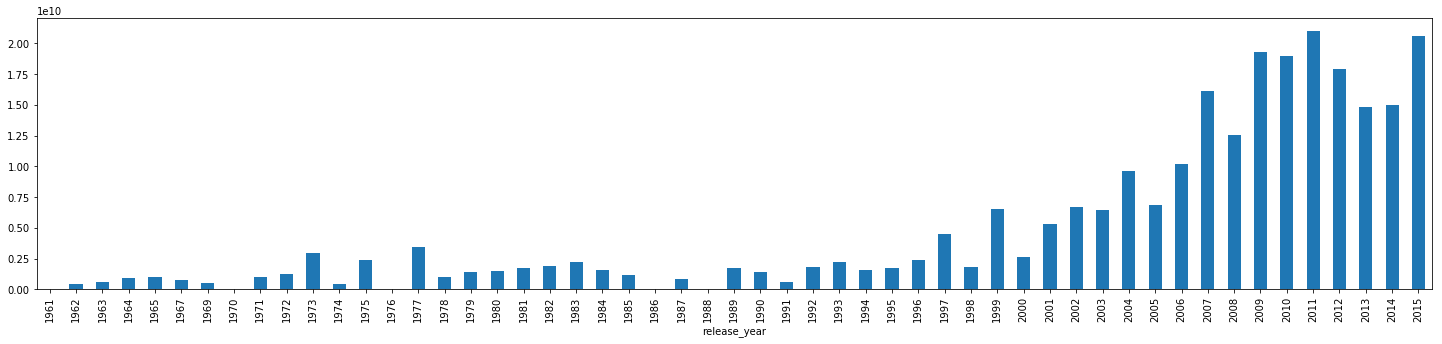

In [12]:
# exploring bar chart to check relationship between 'release_year' and 'revenue_adj'
df.groupby('release_year')['revenue_adj'].sum().plot(kind='bar',figsize= (25,5))

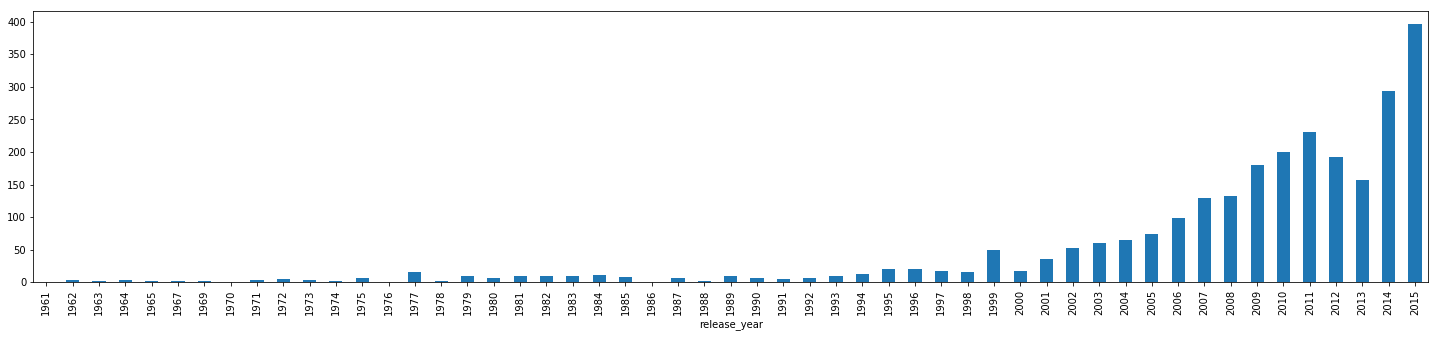

In [13]:
#exploring bar chart to check relationship between 'release_year' and 'popularity'
df.groupby('release_year')['popularity'].sum().plot(kind='bar',figsize= (25,5))


   
>The bar charts above compare popularity average and revenue average from 1961 to 2015 year. It represents the >economic history (the rise) of the global film industry. In the given time slot, the most commercially successful >peaks in film industry with high revenue and high popularity rate were in 2011 and 2015. 



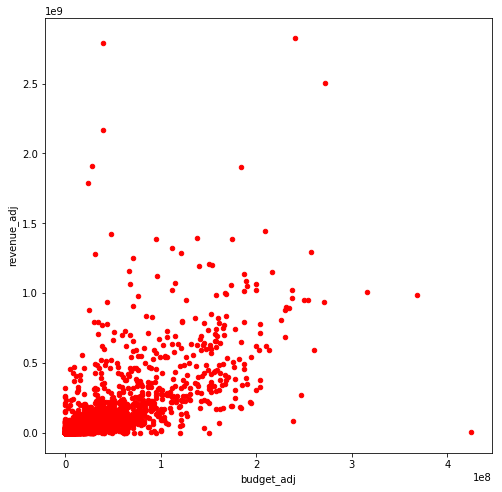

In [14]:
# exploring scatter plot to check relationship between 'budget_adj' and 'revenue_adj'
df.plot(kind='scatter',x='budget_adj',y='revenue_adj',color='red', figsize= (8,8))
plt.show()


>The scatter plot above is conveying strong positive relationship between 'revenue_adj' feature (the vertical axis) and 'budget_adj' feature (the horizontal axis). Meaning that most high-budget movies generate high revenue. However, a few extreme values suggest that in some rare cases the opposite is true when low-budget movies earn high revenue and high-budget movies experience great loss in revenue.   


Text(0.5, 1.0, 'Heatmap of Correlations')

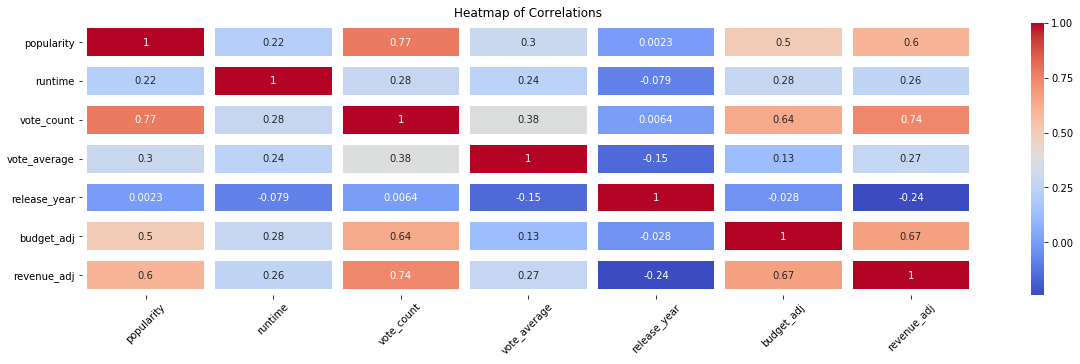

In [15]:
#exploring relationship between 7 columns
plt.figure(figsize=(20,5))
sn.heatmap(df.corr(),annot=True,linewidths=10, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("Heatmap of Correlations")

In [16]:
#calculating correlation between features
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.220787,0.774226,0.298066,0.002262,0.504971,0.600277
runtime,0.220787,1.000000,0.280602,0.243699,-0.078525,0.282257,0.257378
vote_count,0.774226,0.280602,1.000000,0.379345,0.006364,0.642077,0.741541
vote_average,0.298066,0.243699,0.379345,1.000000,-0.152250,0.128789,0.274923
release_year,0.002262,-0.078525,0.006364,-0.152250,1.000000,-0.027940,-0.237684
budget_adj,0.504971,0.282257,0.642077,0.128789,-0.027940,1.000000,0.669152
revenue_adj,0.600277,0.257378,0.741541,0.274923,-0.237684,0.669152,1.000000



    
>The most strongest and meaningful relationship (0.77) can be noticed between 'vote_count' and 'popularity' features. >Also there are strong relationships between the following features:
  <li>0.74 between 'vote_count' and 'revenue_adj';</li>
  <li>0.67 between 'budget_adj' and 'revenue_adj';</li>
  <li>0.64 between 'budget_adj' and 'vote_count';</li>
  <li>0.6 between 'popularity' and 'revenue_adj';</li> 
  <li> 0.5 between 'popularity' and 'budget_adj'.</li>
    


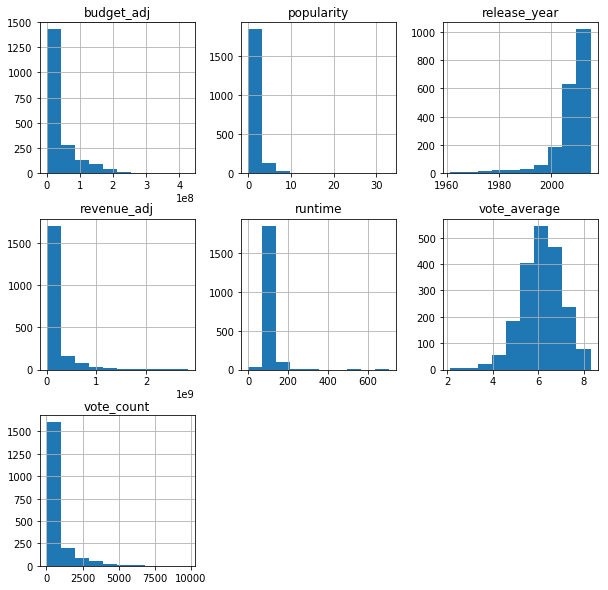

In [17]:
#histograms below represents frequency distribution of data for seven choosen columns
df.hist(figsize=(10,10));


>According seven histograms above, only 'vote_average' has a bell shape with one peak at value of 6 and with the minimum value of 2 and the maximum value of 8. 
> 
>'Vote_count', 'revenue_adj', 'budget_adj' distributions are right-skewed. 
>
>'Release_year' distribution is left-skewed. 
>
>'Runtime' distribution has gaps.
 

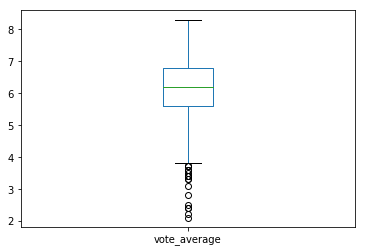

In [18]:
# plotting box plots for vote_average
df['vote_average'].plot(kind='box');

    
>The boxplot above represents five-figure statistical summary of data in 'vote_average' column. The boxplot extends from the lower quartile, at the lower part of the box, to the greater quartile, the highest part. The length of the boxplot is interquartile range. 
>   
>Also it shows the maximum value 8, average value 6 and the minimum value 2. 


In [19]:
# removing all rows with missing values representing by zero
df2 = df[(df != 0).all(1)]

In [32]:
# calculating net profit
df2.loc[:,'net_profit'] = df2['revenue_adj'] - df2['budget_adj']

In [21]:
# converting floating numbers to integers
np.int64(df2['net_profit'])

array([1254445953,  210161353,  170419069, ...,  445668194,  232986238,
        462295506])

In [22]:
# removing negative numbers
df3 = df2.loc[df2['net_profit']>0]

In [23]:
# calculating net profit percentage
df3.loc[:,'margin'] = (df3['net_profit'] / df3['revenue_adj'])*100

In [24]:
# calculating the number of remaining rows and columns
df3.shape

(1022, 10)


    
###  Research Question 1 "What are TOP 100 most profitable movies ?"



In [25]:
# exploring the most profitable movies
#grouping results by two columns
df3.groupby('title').sum().sort_values('margin', ascending=False).head(3)

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,margin
title,,,,,,,,,
Halloween,2.008495,200,763,13.1,3985,1.677784e+07,3.183896e+08,3.016117e+08,180.880750
The Fog,1.267546,189,213,10.4,3985,2.274418e+07,1.081548e+08,8.541058e+07,156.362542
Halloween II,1.130284,197,293,11.6,3990,2.124148e+07,1.013030e+08,8.006148e+07,152.158729


In [26]:
#creating 'profitability' data frame
#computing summary statistics
profitability = df3.groupby('title').sum().sort_values('margin', ascending=False).head(100)
profitability.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,margin
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,2.089596,113.020000,1098.770000,6.966000,2098.150000,2.040521e+07,4.103121e+08,3.899069e+08,97.998921
std,1.993403,30.899962,1240.453362,1.377835,437.299989,2.732959e+07,5.176868e+08,5.022630e+08,12.205909
min,0.028456,79.000000,26.000000,3.900000,1962.000000,9.693980e-01,4.300000e+01,4.000000e+01,91.598809
25%,0.790648,91.000000,254.500000,6.300000,1990.750000,1.107840e+06,4.905223e+07,4.732098e+07,93.319375
50%,1.408998,110.000000,526.000000,6.900000,2006.000000,8.925981e+06,2.092361e+08,1.900877e+08,95.828543
75%,2.411660,122.000000,1641.500000,7.325000,2011.000000,3.176761e+07,5.335027e+08,5.014526e+08,98.162572
max,12.037933,239.000000,5636.000000,13.100000,4017.000000,1.609729e+08,2.789712e+09,2.750137e+09,180.880750


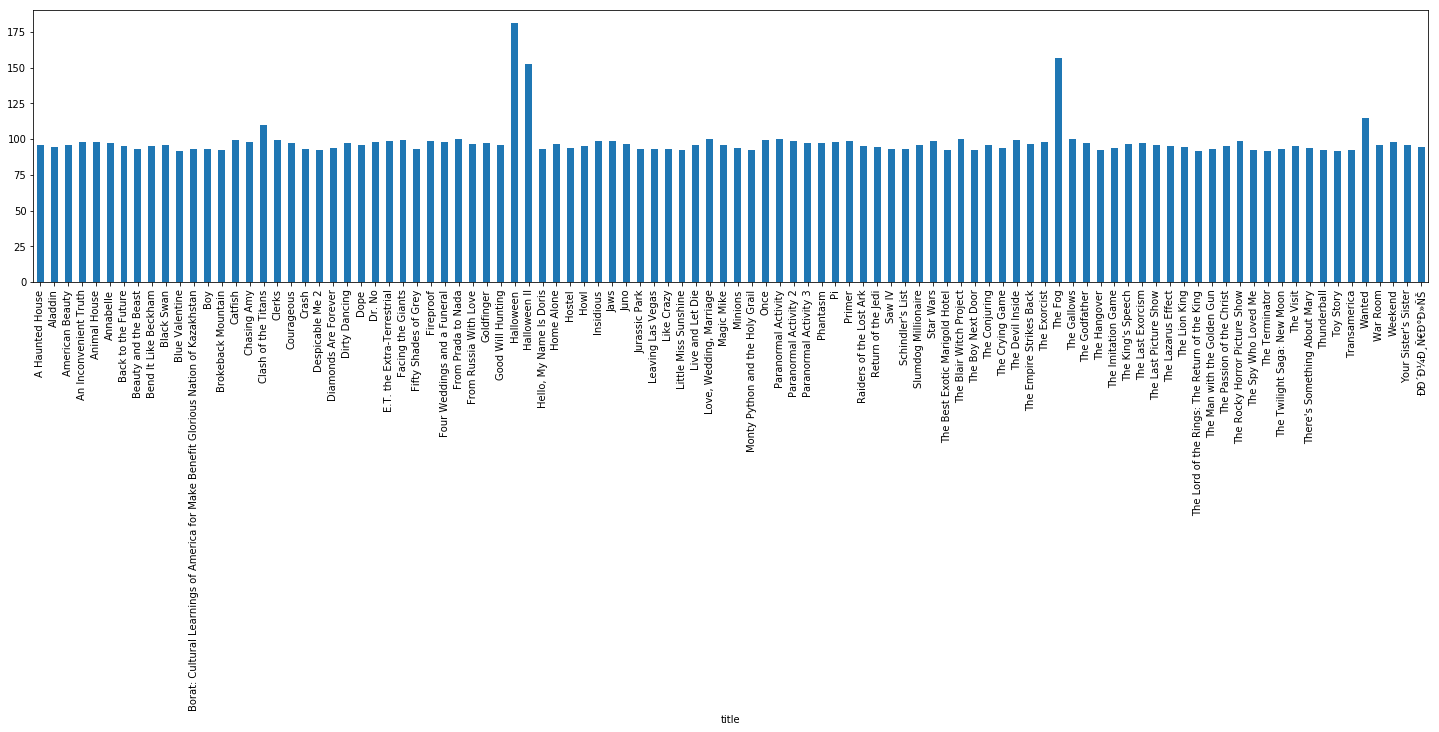

In [27]:
#plotting bar chart of the most profitable movies
#grouping results by two columns
profitability.groupby('title')['margin'].sum().plot(kind='bar', figsize= (25,5))

    
>The Number One Movie with the most profit is 'Halloween' with 181% of net margin ratio during the 55-year period.
>
>The second best movie - 'The Fog' with 156% of net margin ratio.
>
>The third best movie - 'HalloweenII' with 152% of net margin ratio.
    


    
### Research Question 2 " What are TOP 100 most popular movies ?"



In [28]:
# exploring the most popular movies
df3.groupby('title').sum().sort_values('popularity', ascending=False).head(3)

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,margin
title,,,,,,,,,
Jurassic World,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,90.089386
Mad Max: Fury Road,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,60.363216
Interstellar,24.949134,169,6498,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08,73.462108


In [29]:
#creating 'popularity' data frame
#computing summary statistics
popularity= df3.groupby('title').sum().sort_values('popularity', ascending=False).head(100)
popularity.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,margin
count,100.000000,100.00000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,7.175427,129.95000,3843.320000,7.151000,2008.240000,1.229744e+08,7.054055e+08,5.824311e+08,76.702750
std,4.404682,25.16466,1707.839422,0.690995,9.880212,7.552856e+07,5.358188e+08,5.075041e+08,16.861406
min,4.282462,81.00000,1015.000000,5.200000,1972.000000,3.039600e+06,1.288891e+07,7.348699e+06,4.341442
25%,4.943576,112.75000,2675.500000,6.675000,2006.750000,6.369665e+07,3.269440e+08,2.525013e+08,72.969281
50%,5.919163,128.50000,3562.500000,7.300000,2013.000000,1.203874e+08,5.955690e+08,4.510739e+08,78.814197
75%,7.689025,144.25000,4335.000000,7.625000,2014.250000,1.677349e+08,1.002928e+09,8.259422e+08,88.461086
max,32.985763,201.00000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,98.581374


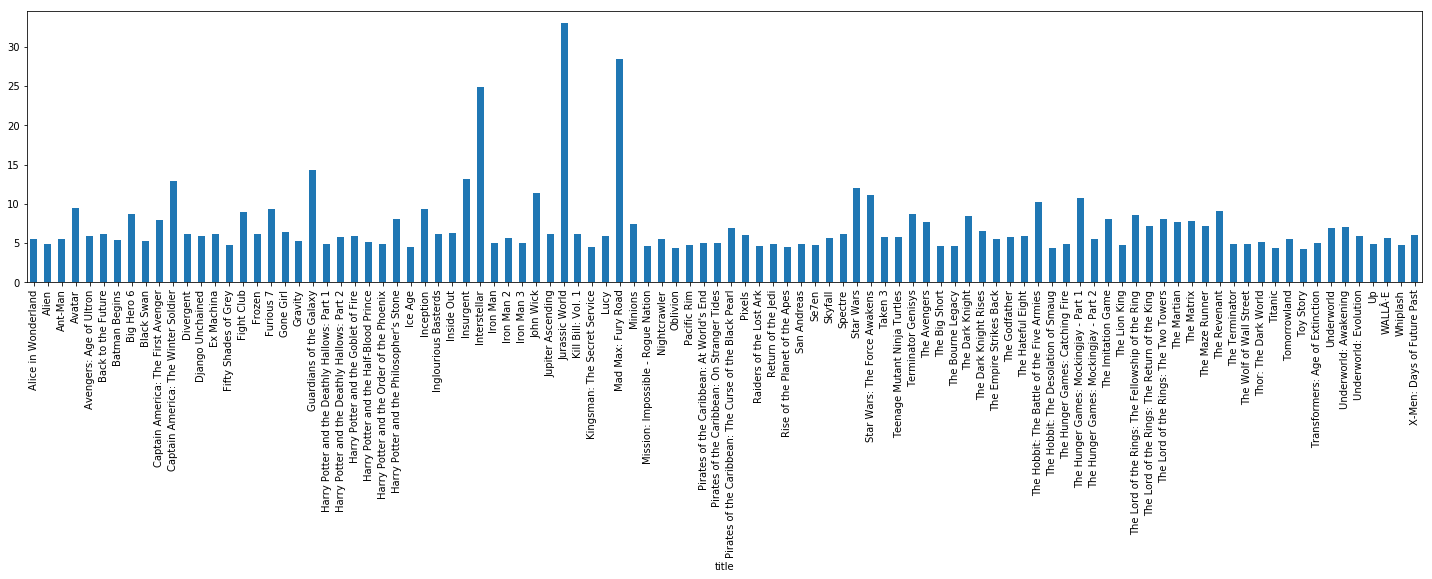

In [30]:
# plotting bar chart of the most popular movies
#grouping results by two columns
popularity.groupby('title')['popularity'].sum().plot(kind='bar',figsize= (25,5))


>The most popular movie was 'Jurassic World' with popularity of 33 during time period from 1960 to 2015.
>
>The second best popular movie is 'Mad Max: Fury Road' with popularity of 28.
>
>The third best movie is 'Interstellar' with popularity of 25.


  
  
# Conclusions




> ## Results
>
>
>
><ul>  
><li> My final goal was to explore successful movies in terms of profitability and popularity. My findings are as follows.</li> 
><li> According TMDb data, the most popular movie was 'Jurassic World' with popularity of 33 during time period from 1960 to 2015. The most profitable movie was 'Halloween' with 180% of net margin ratio during the same 55-year period. Also, there is strong positive correlation of 0.77 between 'vote_count' and 'popularity'. With positive correlation of 0.74 between 'vote_count' and 'revenue_adj', this would imply that 'vote_count' is the influential feature in the dataset, and growing popularity results in higher revenue.</li>
></ul>



      
> ## Limitations
>
>
>
><ul>
><li>
>After cleaning, the dataset size decreased from 10866 rows to 1022 rows. Since 25% of budget and revenue, also 50% of popularity data were missing, it would suggest very strong and statistically significant limitation of the performed analysis.</li>   
></ul>
    
   


> ## References
>
>
><ul>
><li>Pandas (https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)</li>
><li>Pandas Cookbook (https://tutswiki.com/pandas-cookbook/chapter1/)</li>
><li>Jupyter Notebook - Markdown Cells (https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm)</li>
><li> Renaming specific column in pandas (https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas)</li>
><li> Adding new column to existing DataFrame in Python pandas (https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas) </li>
><li>Converting floats to ints in Pandas (https://stackoverflow.com/questions/21291259/convert-floats-to-ints->in-pandas)</li>
><li>Applying Pandas built-in GROUPBY method (http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
></li>
><li>Net Profit Margin https://corporatefinanceinstitute.com/resources/knowledge/finance/net-profit-margin-formula/</li>   
><li>Profit Margin https://en.wikipedia.org/wiki/Profit_margin</li>
><li>Calculating profitability (https://www.accountingformanagement.org/net-profit-ratio/)</li>
><li>Plotting with categorical data (https://seaborn.pydata.org/tutorial/categorical.html)</li>
><li>Understanding Boxplots (https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)</li>
><li>Missing data in pandas (https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)</li>
><li> Why and how ‘Jurassic World’ broke records (https://www.cnbc.com/2015/06/15/why-and-how-jurassic-world-broke-records.html)</li>
><li> HORROR MOVIES MAKE UP THE 10 MOST PROFITABLE FILMS OF THE LAST FIVE YEARS, STUDY SAYS (https://www.altpress.com/news/horror_movies_make_up_the_ten_most_profitable_films_of_the_last_five_years/)</li>
></ul>